<a href="https://colab.research.google.com/github/hungpx2008/AIO-Exercise/blob/main/Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EPOCH 1: Training loss: 0.703, Validation loss: 0.590
EPOCH 2: Training loss: 0.670, Validation loss: 0.574
EPOCH 3: Training loss: 0.640, Validation loss: 0.560
EPOCH 4: Training loss: 0.614, Validation loss: 0.549
EPOCH 5: Training loss: 0.592, Validation loss: 0.539
EPOCH 6: Training loss: 0.572, Validation loss: 0.531
EPOCH 7: Training loss: 0.554, Validation loss: 0.524
EPOCH 8: Training loss: 0.539, Validation loss: 0.519
EPOCH 9: Training loss: 0.526, Validation loss: 0.514
EPOCH 10: Training loss: 0.514, Validation loss: 0.511
EPOCH 11: Training loss: 0.504, Validation loss: 0.508
EPOCH 12: Training loss: 0.495, Validation loss: 0.506
EPOCH 13: Training loss: 0.487, Validation loss: 0.504
EPOCH 14: Training loss: 0.480, Validation loss: 0.503
EPOCH 15: Training loss: 0.474, Validation loss: 0.502
EPOCH 16: Training loss: 0.468, Validation loss: 0.501
EPOCH 17: Training loss: 0.463, Validation loss: 0.500
EPOCH 18: Training loss: 0.459, Validation loss: 0.500
EPOCH 19: Training 

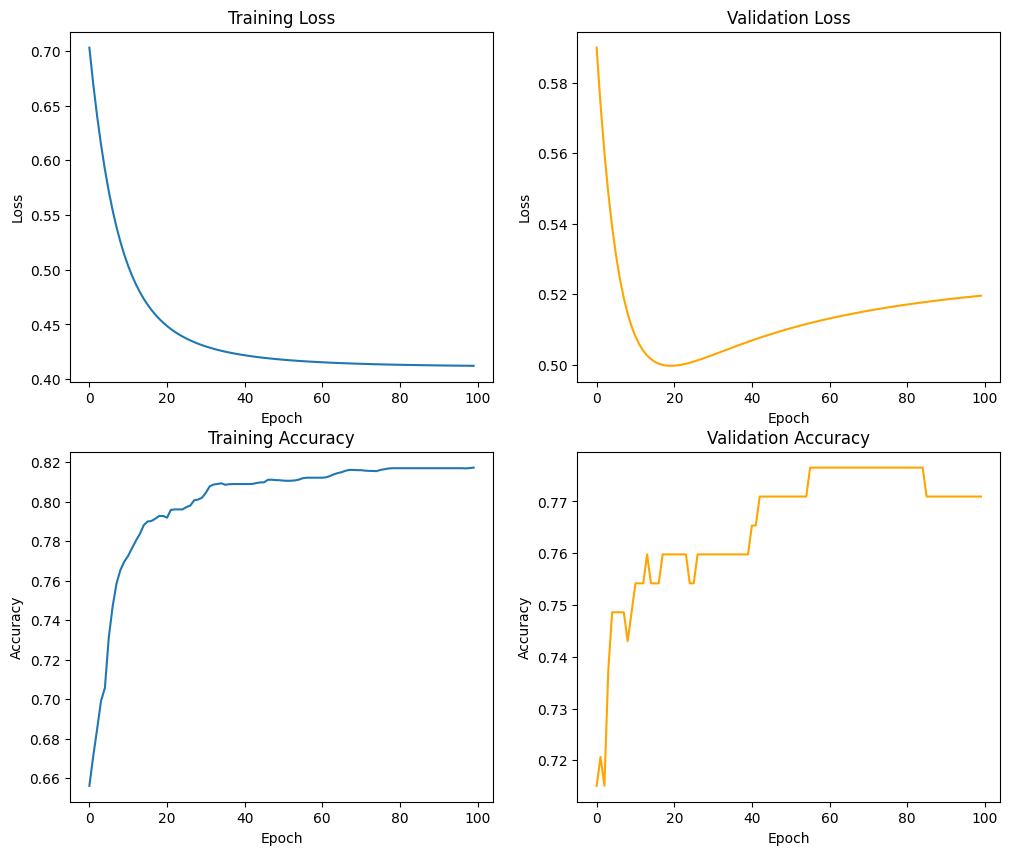

Evaluation on validation and test set:
Validation Accuracy: 0.770949720670391
Test Accuracy: 0.7752808988764045


In [1]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu Titanic
dataset_path = '/content/titanic_modified_dataset.csv'  # Đường dẫn đến tập tin dữ liệu của bạn
df = pd.read_csv(dataset_path, index_col='PassengerId')

# Chuyển đổi dữ liệu thành numpy array và tách biến X, y
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]

# Thêm bias vào X
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

# Chia tập train, val, test
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X_b, y, test_size=val_size, random_state=random_state, shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, shuffle=is_shuffle)

# Chuẩn hóa dữ liệu
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

# Định nghĩa hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hàm dự đoán
def predict(X, theta):
    return sigmoid(np.dot(X, theta))

# Hàm tính loss (Cross-Entropy)
def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

# Hàm tính gradient
def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size

# Hàm cập nhật trọng số
def update_theta(theta, gradient, lr):
    return theta - lr * gradient

# Hàm tính độ chính xác
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    return (y_hat == y).mean()

# Khai báo các siêu tham số và khởi tạo trọng số
lr = 0.01
epochs = 100
batch_size = 16
np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

# Huấn luyện mô hình
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)
    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

    train_losses.append(np.mean(train_batch_losses))
    val_losses.append(np.mean(val_batch_losses))
    train_accs.append(np.mean(train_batch_accs))
    val_accs.append(np.mean(val_batch_accs))

    print(f"EPOCH {epoch + 1}: Training loss: {train_losses[-1]:.3f}, Validation loss: {val_losses[-1]:.3f}")

# Trực quan hóa quá trình huấn luyện
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss', title='Training Loss')
ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss', title='Validation Loss')
ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy', title='Training Accuracy')
ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy', title='Validation Accuracy')
plt.show()

# Đánh giá mô hình
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Validation Accuracy: {val_set_acc}')
print(f'Test Accuracy: {test_set_acc}')
